In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Transforming Data for Linear Regression
* try p rasied to the (-1,-0.5, ln=0, 0.5, 1, 1.5, 2)

* Look at the histogram of the residuals

Right (positive skew): \
square root transformation \
log transformation \
reciprocal transformation 

Left (negative) skew:\
square transformation \
exponential transformation 

* If linearity is the problem:  transform the predcitor
* If linearity and or equality of variance are the problem:  transform the response or both

* Careful about negative numbers in your data with transformations

* Remember that your model is now in transformed values.

# Read in Animals csv

In [17]:
animals=pd.read_csv('Animals2.csv')
animals

,Unnamed: 0,body,brain
0,Lesser short-tailed shrew,0.5,0.14
1,Little brown bat,1.0,0.25
2,Big brown bat,2.3,0.30
3,Mouse,2.3,0.40
4,Musk shrew,4.8,0.33
...,...,...,...
60,Asian elephant,254700.0,4603.00
61,African elephant,665400.0,5712.00
62,Triceratops,940000.0,70.00
63,Dipliodocus,1170000.0,50.00


# Create a scatterplot

<AxesSubplot:xlabel='body', ylabel='brain'>

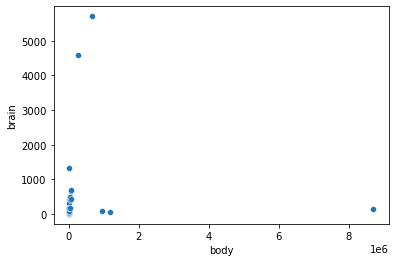

In [18]:
sns.scatterplot(x="body",y="brain",data=animals)

# Explore and transform the data

In [19]:
#fit the simple linear regression model
model1=ols('brain~body',data=animals)
results1=model1.fit()
print(results1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.013    
Dependent Variable: brain            AIC:                1072.9097 
Date:               2022-07-13 15:26 BIC:                1077.2585 
No. Observations:   65               Log-Likelihood:     -534.45   
Df Model:           1                F-statistic:        0.1686    
Df Residuals:       63               Prob (F-statistic): 0.683     
R-squared:          0.003            Scale:              8.3747e+05
--------------------------------------------------------------------
                Coef.    Std.Err.    t     P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
Intercept      266.3158  115.1575  2.3126  0.0240  36.1919  496.4397
body             0.0000    0.0001  0.4106  0.6827  -0.0002    0.0003
-------------------------------------------------------------------
Omnibus:             103.734       Durbin-Watson:          0.

eval_env: 1


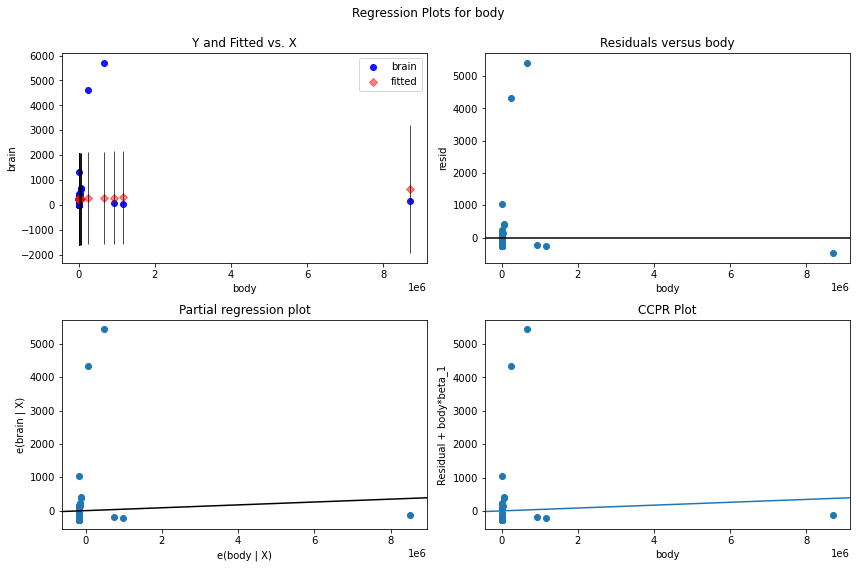

In [20]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results1,'body',fig=fig)

<AxesSubplot:ylabel='Density'>

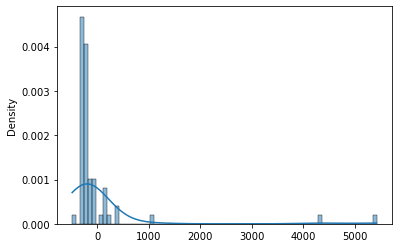

In [21]:
# right skewed data: positive skew
sns.histplot(x=results1.resid, stat='density',kde=True)

# Create a new, transformed scatterplot

In [22]:
body1=np.log(animals['body'])
brain1=np.log(animals['brain'])

Text(0, 0.5, 'ln(brain)')

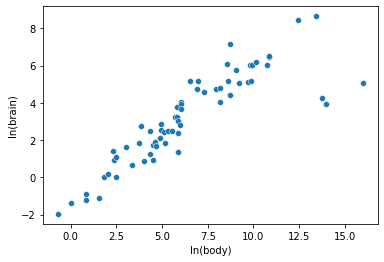

In [23]:
sns.scatterplot(x=body1,y=brain1)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

Text(336.9714285714286, 0.5, 'ln(brain)')

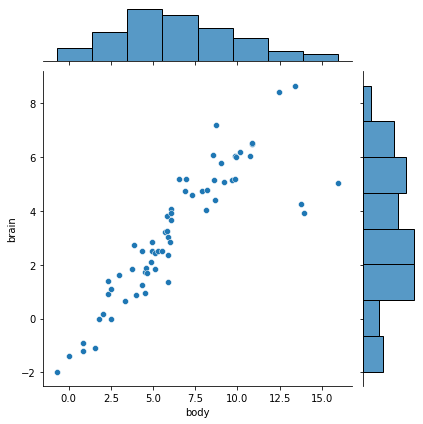

In [24]:
sns.jointplot(x=body1,y=brain1)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

# Are the variables related

In [25]:
stats.pearsonr(body1,brain1)

(0.875309238556917, 1.5029489604419077e-21)

# Fit the simple linear regression model to the transformed data

In [26]:
DF=pd.concat([body1,brain1],axis='columns')
print(DF)

         body     brain
0   -0.693147 -1.966113
1    0.000000 -1.386294
2    0.832909 -1.203973
3    0.832909 -0.916291
4    1.568616 -1.108663
..        ...       ...
60  12.447842  8.434464
61  13.408144  8.650325
62  13.753635  4.248495
63  13.972514  3.912023
64  15.978834  5.040194

[65 rows x 2 columns]


In [27]:
#fit the simple linear regression model
model2=ols('brain1~body1',DF)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.762   
Dependent Variable: brain1           AIC:                207.1072
Date:               2022-07-13 15:26 BIC:                211.4559
No. Observations:   65               Log-Likelihood:     -101.55 
Df Model:           1                F-statistic:        206.4   
Df Residuals:       63               Prob (F-statistic): 1.50e-21
R-squared:          0.766            Scale:              1.3745  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.5524    0.2988  -1.8484  0.0692  -1.1495  0.0448
body1           0.5915    0.0412  14.3674  0.0000   0.5092  0.6738
-----------------------------------------------------------------
Omnibus:              21.364       Durbin-Watson:          0.811 
Prob(Omnibus):        

# Calculate the predcitions based on the model and create residual plots

Create body weight verus y_predicted plots

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


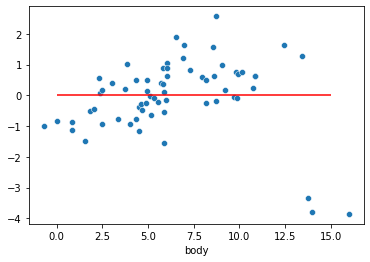

In [28]:
# Calculate the predcitions based on the model
y_pred=-0.5524+0.5915*body1
y_value=brain1
error=y_value-y_pred
sns.scatterplot(body1,error)
plt.hlines(0,0,15,color='red')

0    -0.962397
1    -0.552400
2    -0.059734
3    -0.059734
4     0.375436
        ...   
60    6.810498
61    7.378517
62    7.582875
63    7.712342
64    8.899080
Name: body, Length: 65, dtype: float64


C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'ln(brain)')

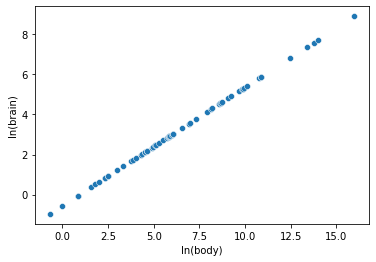

In [29]:
print(y_pred)
sns.scatterplot(body1,y_pred)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")

eval_env: 1


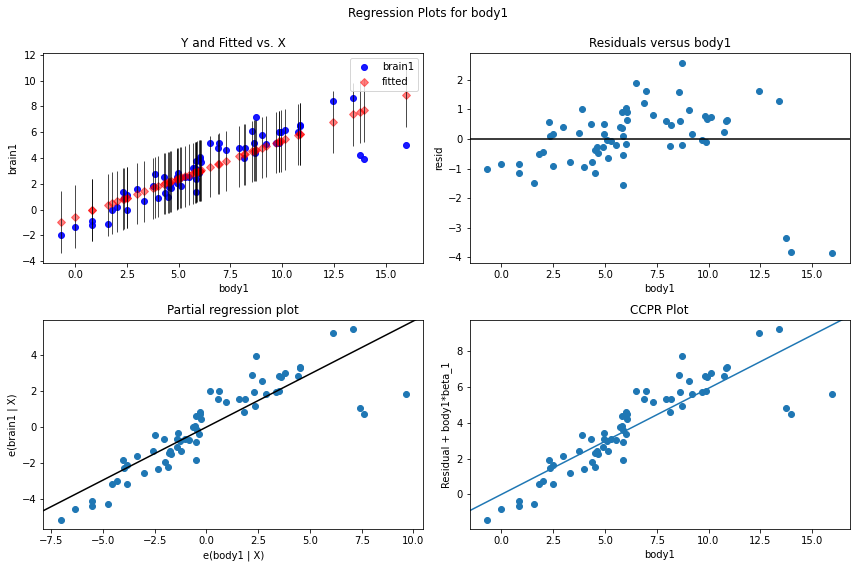

In [30]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results2,'body1',fig=fig)

# Explore for normality of residuals

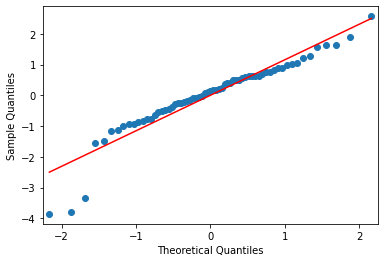

In [31]:
sm.qqplot(results2.resid,line='s')
plt.show()

In [32]:
stats.shapiro(results2.resid)

ShapiroResult(statistic=0.9121341705322266, pvalue=0.00021153483248781413)

<AxesSubplot:ylabel='Density'>

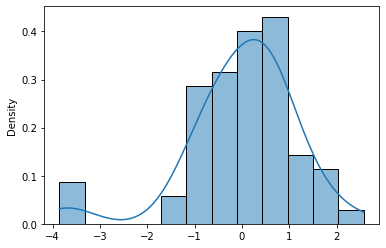

In [33]:
sns.histplot(x=results2.resid, stat='density',kde=True)

# Any concerns for other OLS issues? What could you do to explore or deal with these?

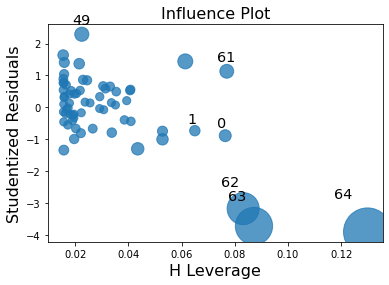

In [34]:
fig=sm.graphics.influence_plot(results2,criterion='cooks')

* Outlier:  An outlier is a data point whose response y does not follow the general trend of the rest of the data.
* Leverage:   A data point has high leverage if it has "extreme" predictor x values.
* Influence:  A data point is influential if it unduly influences any part of a regression analysis.

Cooks distance is an estimate of the influence of a data point, taking into account both the leverage and the residual of each observation.

Studentized residual is a standardized residual. 

In [40]:
# obtain Cook's distance 
lm_cooksd = results2.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(DF["body"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(DF.index[out_d], "\n", 
    lm_cooksd[out_d])

Critical Cooks distance: 0.06153846153846154
Int64Index([60, 62, 63, 64], dtype='int64') 
 [0.06681153 0.40011876 0.54998919 0.92995096]


In [41]:
lm_cooksd

array([3.28232076e-02, 1.87981444e-02, 2.80290878e-02, 1.57072875e-02,
       3.80689102e-02, 4.16612967e-03, 3.16282280e-03, 4.50777223e-03,
       9.54749411e-05, 1.10590813e-02, 3.83696044e-04, 1.71117620e-03,
       6.15007580e-03, 3.28619668e-04, 8.78550208e-03, 7.46887039e-03,
       1.99966675e-03, 4.60788942e-03, 9.85702825e-03, 1.07409874e-03,
       5.84941513e-04, 1.71906266e-03, 4.47740499e-04, 1.61268013e-04,
       1.59125540e-03, 3.58406198e-06, 2.69097426e-03, 3.27085423e-05,
       2.96225861e-04, 9.41978463e-04, 7.86339824e-04, 4.80585338e-03,
       1.41680350e-02, 1.67265768e-03, 7.78366410e-05, 1.60256159e-04,
       6.30663286e-03, 4.65164242e-03, 2.34897525e-03, 2.04974711e-02,
       8.69398224e-03, 1.57249650e-02, 4.18053587e-03, 2.59145555e-03,
       4.58130012e-04, 1.75918755e-03, 2.02450458e-02, 3.15823810e-03,
       3.35615826e-04, 5.65184933e-02, 9.04175867e-03, 2.52059924e-04,
       2.16249836e-05, 7.01640522e-03, 9.33302950e-05, 5.62261298e-03,
      

# Create the final regression plot

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'ln(brain)')

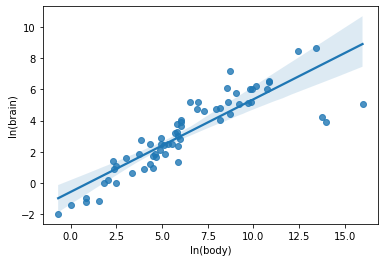

In [42]:
sns.regplot(body1,brain1,DF)
plt.xlabel("ln(body)")
plt.ylabel("ln(brain)")